In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
#Data with smaller Datasize and less factors
dfit=pd.read_csv('dataset.csv')
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
x=dfit.iloc[:,2:9]
y=dfit["click"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=10)
claf = SVC(kernel='rbf', C=10,random_state=3,gamma=0.01).fit(x_train, y_train)
print(claf.score(x_test, y_test))
predictions=claf.predict(x_test)
print(predictions)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

0.9484
[0 0 0 ... 0 0 0]
[[14223    21]
 [  753     3]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     14244
           1       0.12      0.00      0.01       756

    accuracy                           0.95     15000
   macro avg       0.54      0.50      0.49     15000
weighted avg       0.91      0.95      0.92     15000



In [3]:
#A larger Dataset with more factors lik btag
finaldata=pd.read_csv("final_dataset.csv")

In [4]:
#without btag factor
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
y=finaldata['click']
x=finaldata[['ad_position_type','cms_group_id','gender','age_level','shopping_level','occupation','new_user_class_level','price','cate']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.6,random_state=10)
claf = SVC(kernel='rbf', C=10,random_state=3,gamma=0.1).fit(x_train, y_train)
print(claf.score(x_test, y_test))
y_prediction=claf.predict(x_test)
print(y_prediction)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_prediction))
print(classification_report(y_test,y_prediction))

0.9569722222222222
[0 0 0 ... 0 0 0]
[[33604   349]
 [ 1200   847]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     33953
           1       0.71      0.41      0.52      2047

    accuracy                           0.96     36000
   macro avg       0.84      0.70      0.75     36000
weighted avg       0.95      0.96      0.95     36000



In [5]:
#with all factors
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
y=finaldata['click']
x=finaldata[['ad_position_type','cms_group_id','gender','age_level','shopping_level','occupation','new_user_class_level','price','btag','cate']]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.6,random_state=10)
claf = SVC(kernel='rbf', C=10,random_state=3,gamma=0.1).fit(x_train, y_train)
print(claf.score(x_test, y_test))
y_prediction=claf.predict(x_test)
print(y_prediction)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_prediction))
print(classification_report(y_test,y_prediction))

0.9563055555555555
[0 0 0 ... 0 0 0]
[[33587   366]
 [ 1207   840]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     33953
           1       0.70      0.41      0.52      2047

    accuracy                           0.96     36000
   macro avg       0.83      0.70      0.75     36000
weighted avg       0.95      0.96      0.95     36000



In [6]:
#with optimized gamma=0.36806342015855037
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
y=finaldata['click']
x=finaldata[['ad_position_type','cms_group_id','gender','age_level','shopping_level','occupation','new_user_class_level','price','btag','cate']]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.6,random_state=10)
claf = SVC(kernel='rbf', C=10,random_state=3,gamma=0.36806342015855037).fit(x_train, y_train)
print(claf.score(x_test, y_test))
y_prediction=claf.predict(x_test)
print(y_prediction)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_prediction))
print(classification_report(y_test,y_prediction))


0.9568611111111112
[0 0 0 ... 0 0 0]
[[33623   330]
 [ 1223   824]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     33953
           1       0.71      0.40      0.51      2047

    accuracy                           0.96     36000
   macro avg       0.84      0.70      0.75     36000
weighted avg       0.95      0.96      0.95     36000



In [7]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)
X_train

array([[ 1.3580412 ,  0.7062393 , -1.31650063, ..., -0.10674667,
        -0.1966049 ,  0.36999569],
       [-0.73635469, -1.3070676 ,  0.75958946, ..., -0.11593714,
        -0.1966049 , -2.3295453 ],
       [-0.73635469,  1.28146984, -1.31650063, ..., -0.10714625,
        -0.1966049 ,  0.29314207],
       ...,
       [ 1.3580412 , -0.44422179,  0.75958946, ...,  2.18687594,
        -0.1966049 ,  0.66544495],
       [ 1.3580412 , -1.01945233,  0.75958946, ..., -0.14830359,
        -0.1966049 ,  0.14863885],
       [-0.73635469,  1.28146984, -1.31650063, ...,  0.32480602,
        -0.1966049 ,  0.29314207]])

       principal component 1  principal component 2  click
0                  -0.340174               0.901279      0
1                   2.027974              -0.167620      0
2                  -2.075809              -0.396961      0
3                  -2.071439              -0.386652      0
4                   1.361101               2.383118      0
...                      ...                    ...    ...
23995               1.362682               2.386849      0
23996               0.693238               0.802718      0
23997               0.793865               1.815584      0
23998               1.842529               1.246844      0
23999              -2.062761              -0.366176      0

[24000 rows x 3 columns]
1322


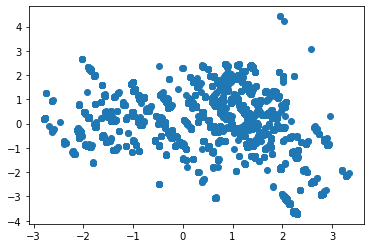

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_train)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

y_train.index = range(0,len(y_train))    
finalDf = pd.concat([principalDf, y_train], axis = 1)

print(finalDf)
print(sum(finalDf['click']))
import matplotlib.pyplot as plt
plt.plot(finalDf['principal component 1'],finalDf['principal component 2'],'o')

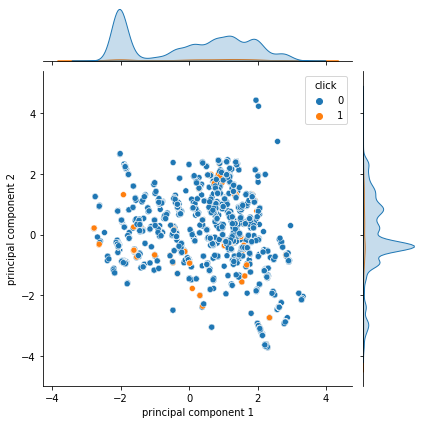

In [9]:
sb.jointplot(data=finalDf,x='principal component 1',y='principal component 2',hue='click')

In [ ]:
#我电脑跑不动，最好别跑
from matplotlib.colors import ListedColormap
x_set, y_set = principalComponents, y_train
X1, X2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
Xpred = np.array([X1.ravel(), X2.ravel()] + [np.repeat(0, X1.ravel().size) for _ in range(8)]).T
pred = claf.decision_function(Xpred).reshape(X1.shape)    
plt.contour(X1, X2, pred,
             alpha=1.0, cmap=ListedColormap(('red', 'green','blue')), levels=np.linspace(pred.min(), pred.max(), 100))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('features')
plt.ylabel('click')
plt.legend()
plt.show()

In [24]:
#smaller size data without 'btag','cate','ad_position'
smallfinaldata=finaldata.iloc[1:30000,:]
y=smallfinaldata['click']
x=smallfinaldata[['cms_group_id','gender','age_level','shopping_level','occupation','new_user_class_level','price']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.6,random_state=10)
claf = SVC(kernel='rbf', C=10,random_state=3,gamma=0.1).fit(x_train, y_train)
print(claf.score(x_test, y_test))
y_prediction=claf.predict(x_test)
print(y_prediction)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_prediction))
print(classification_report(y_test,y_prediction))

0.9566111111111111
[0 0 0 ... 0 0 0]
[[16982    94]
 [  687   237]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17076
           1       0.72      0.26      0.38       924

    accuracy                           0.96     18000
   macro avg       0.84      0.63      0.68     18000
weighted avg       0.95      0.96      0.95     18000



In [28]:
#with only 'age_level','shopping_level','occupation','new_user_class_level' factor
smallfinaldata=finaldata.iloc[1:30000,:]
y=smallfinaldata['click']
x=smallfinaldata[['age_level','shopping_level','occupation','new_user_class_level']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.6,random_state=10)
claf = SVC(kernel='rbf', C=10,random_state=3,gamma=0.1).fit(x_train, y_train)
print(claf.score(x_test, y_test))
y_prediction=claf.predict(x_test)
print(y_prediction)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_prediction))
print(classification_report(y_test,y_prediction))

0.9486666666666667
[0 0 0 ... 0 0 0]
[[17076     0]
 [  924     0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     17076
           1       0.00      0.00      0.00       924

    accuracy                           0.95     18000
   macro avg       0.47      0.50      0.49     18000
weighted avg       0.90      0.95      0.92     18000



/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
#add price factor
smallfinaldata=finaldata.iloc[1:30000,:]
y=smallfinaldata['click']
x=smallfinaldata[['age_level','shopping_level','occupation','new_user_class_level','price']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.6,random_state=10)
claf = SVC(kernel='rbf', C=10,random_state=3,gamma=0.1).fit(x_train, y_train)
print(claf.score(x_test, y_test))
y_prediction=claf.predict(x_test)
print(y_prediction)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_prediction))
print(classification_report(y_test,y_prediction))

0.9558888888888889
[0 0 0 ... 0 0 0]
[[16992    84]
 [  710   214]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17076
           1       0.72      0.23      0.35       924

    accuracy                           0.96     18000
   macro avg       0.84      0.61      0.66     18000
weighted avg       0.95      0.96      0.94     18000

